#### We will classify a list of clients using clustering

In [1]:
#Import all the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
#Import the Dataframe
df = pd.read_excel("Ventas_2025.xlsx")
df.head(5)

,Edad,Frecuencia_Compra,Monto_Promedio,Compras_Anuales
0,56,7,242,16
1,46,2,73,71
2,32,3,77,69
3,60,17,342,37
4,25,5,379,44


In [4]:
#Renaming the columns from spanish to english
df.rename(columns={"Edad":"Age"}, inplace=True)
df.rename(columns={"Frecuencia_Compra":"Purchase_freq"}, inplace=True)
df.rename(columns={"Monto_Promedio":"Avg_amount"}, inplace=True)
df.rename(columns={"Compras_Anuales":"Annual_purchases"}, inplace=True)

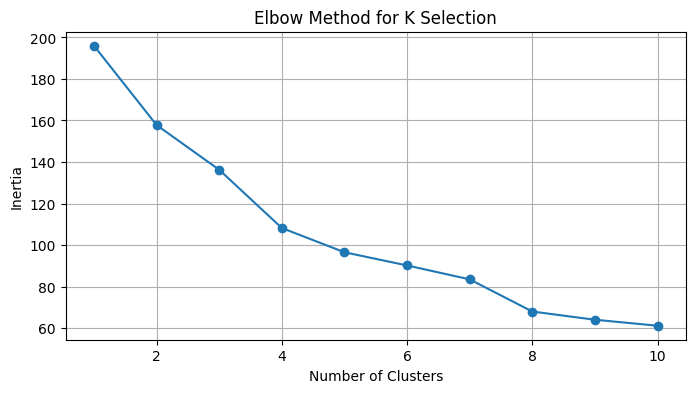

In [5]:
#Scaling numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for K Selection')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

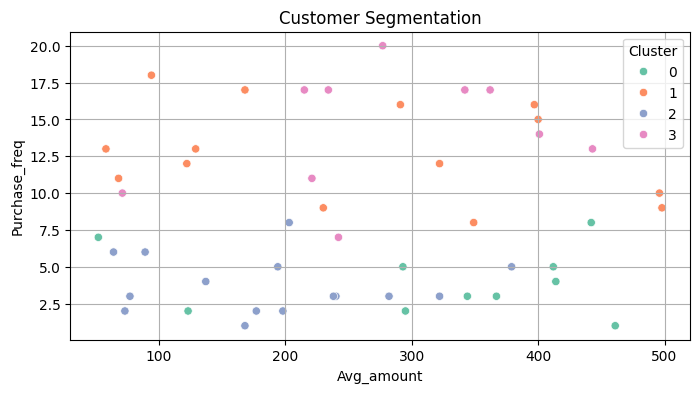

In [6]:
#Train model with optimal K (you can adjust here)
k_optimo = 4
modelo_kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = modelo_kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

#Cluster visualization (we use 2 main variables if there are many)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x=df.columns[2], y=df.columns[1], hue='Cluster', palette='Set2')
plt.title('Customer Segmentation')
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[1])
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [7]:
#Averages per cluster
print("📊 Average profile per cluster:")
display(df.groupby('Cluster').mean().round(2))

📊 Average profile per cluster:


,Age,Purchase_freq,Avg_amount,Annual_purchases
Cluster,,,,
0,56.30,4.00,320.30,57.30
1,36.14,12.79,258.71,64.14
2,37.67,3.73,189.40,40.60
3,52.60,14.30,280.80,25.30


In [8]:
#Export as CSV to work with POWER BI
df.to_csv('Clustering_2025.csv', index=False)